# call back

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                   test_size=0.3,
                                                   random_state=1234)

In [7]:
x_train = x_train.reshape(-1,28,28,1)/255
x_val = x_val.reshape(-1,28,28,1)/255
x_test = x_test.reshape(-1,28,28,1)/255

* 1) 입력 : 28,28,1이 들어가서 -> Conv2D(3,3) 크기의 32개, relu -> Conv2D(3,3)크기의 32개, relu -> MaxPooling2D(strides=2) -> GlobalAveragePooling2D -> 10개 분류
tf.keras의 함수형으로 위의 모델을 만들어보세요<br>
* 2) compile 조건 : adam, sparse_categorical_crossentropy, accuracy

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Input
from tensorflow.keras.layers import GlobalAveragePooling2D

In [12]:
# input layer
input_layer = Input(shape=(28,28,1))

# hidden layer
x = Conv2D(32,(3,3),activation="relu")(input_layer)
x = Conv2D(32,(3,3),activation="relu")(x)
x = MaxPooling2D(strides=2)(x)
x = GlobalAveragePooling2D()(x)

# output layer
x = Dense(10, activation="softmax")(x)

model = Model(inputs=input_layer, outputs=x)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
from tensorflow.keras.utils import plot_model

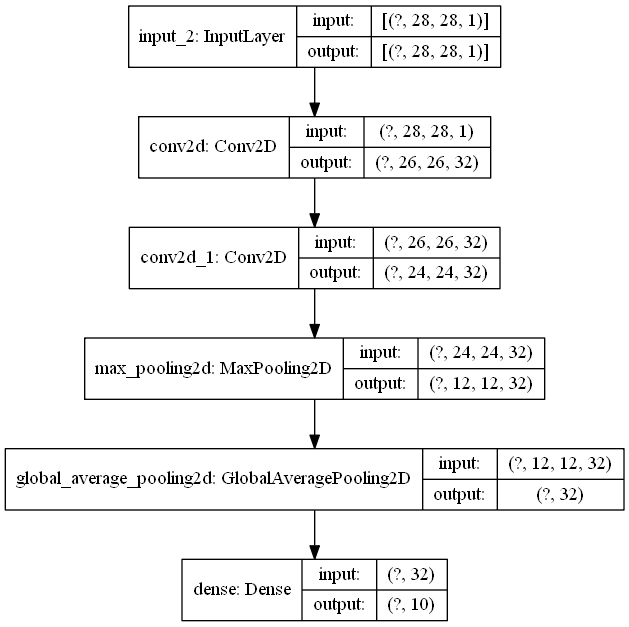

In [16]:
plot_model(model, show_shapes=True)

In [17]:
history = model.fit(x_train, y_train,
                    batch_size=32, epochs=20,
                    validation_data=(x_val,y_val))

Epoch 1/20
1313/1313 [==============================] - 23s 17ms/step - loss: 1.6702 - accuracy: 0.4054 - val_loss: 1.3076 - val_accuracy: 0.5815
Epoch 2/20
1313/1313 [==============================] - 23s 17ms/step - loss: 1.1655 - accuracy: 0.6226 - val_loss: 1.0057 - val_accuracy: 0.6951
Epoch 3/20
1313/1313 [==============================] - 23s 17ms/step - loss: 0.9234 - accuracy: 0.7138 - val_loss: 0.8227 - val_accuracy: 0.7591
Epoch 4/20
1313/1313 [==============================] - 23s 18ms/step - loss: 0.7764 - accuracy: 0.7620 - val_loss: 0.7353 - val_accuracy: 0.7838
Epoch 5/20
1313/1313 [==============================] - 23s 18ms/step - loss: 0.6784 - accuracy: 0.7949 - val_loss: 0.6798 - val_accuracy: 0.7713
Epoch 6/20
1313/1313 [==============================] - 23s 18ms/step - loss: 0.6050 - accuracy: 0.8199 - val_loss: 0.5745 - val_accuracy: 0.8221
Epoch 7/20
1313/1313 [==============================] - 24s 18ms/step - loss: 0.5460 - accuracy: 0.8362 - val_loss: 0.5133 -

call back 중 ModelCheckponit (중간에 모델들을 저장하고 싶을 때)
- filepath : 모델 저장할 경로
- monitor : 뫼터링을 할 평가지표
- verbose : 과정에 대한 상세함 (0~2)
- save_best_only : True를 하면 제일 좋은 모델 1개만 저장
- save_weights_only : 
- mode : auto/min/max

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [20]:
save_path = "models/best_model.hdf5"
callback = [ModelCheckpoint(
    filepath = save_path,
    monitor = "val_accuracy",  # train 데이터를 보고 기록의 기준을 함
    verbose=1,
    save_best_only=True
)]

In [21]:
# callback의 ModelCheckpoint을 포함시킨 학습
history = model.fit(x_train, y_train,
                    batch_size=32, epochs=20,
                    validation_data=(x_val,y_val),
                    callbacks=callback)

Epoch 1/20
1313/1313 [==============================] - ETA: 0s - loss: 0.2863 - accuracy: 0.9121
Epoch 00001: accuracy improved from -inf to 0.91210, saving model to models\best_model.hdf5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.2863 - accuracy: 0.9121 - val_loss: 0.2913 - val_accuracy: 0.9088
Epoch 2/20
1312/1313 [============================>.] - ETA: 0s - loss: 0.2766 - accuracy: 0.9164
Epoch 00002: accuracy improved from 0.91210 to 0.91640, saving model to models\best_model.hdf5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.2765 - accuracy: 0.9164 - val_loss: 0.2959 - val_accuracy: 0.9077
Epoch 3/20
1310/1313 [============================>.] - ETA: 0s - loss: 0.2711 - accuracy: 0.9170
Epoch 00003: accuracy improved from 0.91640 to 0.91702, saving model to models\best_model.hdf5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.2710 - accuracy: 0.9170 - val_loss: 0.2620 - val_accuracy: 0.9184
Epoch 4/20
1311/131

callback 중에서 중간에 멈푸는 EarlyStopping에 대한 부분
* patience=5 -> 5번의 epoch를 수행을 하면서 더이상 성능향상이 없으면 학습을 멈춤

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
callbacks=[
    EarlyStopping(monitor="val_accuracy", patience=3, verbose=1)
]

In [24]:
# callback의 EarlyStopping 포함시킨 학습
history = model.fit(x_train, y_train,
                    batch_size=32, epochs=20,
                    validation_data=(x_val,y_val),
                    callbacks=callbacks)

Epoch 1/20
1313/1313 [==============================] - 23s 17ms/step - loss: 0.2037 - accuracy: 0.9375 - val_loss: 0.2311 - val_accuracy: 0.9284
Epoch 2/20
1313/1313 [==============================] - 23s 17ms/step - loss: 0.2016 - accuracy: 0.9381 - val_loss: 0.1887 - val_accuracy: 0.9425
Epoch 3/20
1313/1313 [==============================] - 23s 18ms/step - loss: 0.1994 - accuracy: 0.9390 - val_loss: 0.1848 - val_accuracy: 0.9460
Epoch 4/20
1313/1313 [==============================] - 24s 18ms/step - loss: 0.1962 - accuracy: 0.9392 - val_loss: 0.1957 - val_accuracy: 0.9425
Epoch 5/20
1313/1313 [==============================] - 24s 18ms/step - loss: 0.1950 - accuracy: 0.9404 - val_loss: 0.2205 - val_accuracy: 0.9294
Epoch 6/20
1313/1313 [==============================] - 24s 18ms/step - loss: 0.1922 - accuracy: 0.9412 - val_loss: 0.1857 - val_accuracy: 0.9451
Epoch 00006: early stopping


ReduceLROnPlateau -> 중간에 진행을 하다가 성능 향상이 없으면, 멈추는 것이 아니라 좀 더 자세하게 공부하도록 learning rate를 조정하게 함
* factor : 0.1 -> 0.01 (새로운 learn rate = factor * 기존 learn rate) 1보다 작은 값으로 설정해야 함
* patience
* min_ir :

In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [27]:
callbacks=[
    ReduceLROnPlateau(monitor="val_accuracy",
                      patience = 5,
                      factor = 0.2,
                      verbose=2,
                      min_ir=1e-5)
]

In [28]:
# callback의 ReduceLROnPlateau 포함시킨 학습
history = model.fit(x_train, y_train,
                    batch_size=32, epochs=50,
                    validation_data=(x_val,y_val),
                    callbacks=callbacks)

Epoch 1/50
1313/1313 [==============================] - 23s 17ms/step - loss: 0.1886 - accuracy: 0.9425 - val_loss: 0.2024 - val_accuracy: 0.9378
Epoch 2/50
1313/1313 [==============================] - 22s 17ms/step - loss: 0.1892 - accuracy: 0.9421 - val_loss: 0.1820 - val_accuracy: 0.9464
Epoch 3/50
1313/1313 [==============================] - 23s 17ms/step - loss: 0.1859 - accuracy: 0.9415 - val_loss: 0.1768 - val_accuracy: 0.9479
Epoch 4/50
1313/1313 [==============================] - 23s 18ms/step - loss: 0.1842 - accuracy: 0.9426 - val_loss: 0.1921 - val_accuracy: 0.9434
Epoch 5/50
1313/1313 [==============================] - 23s 18ms/step - loss: 0.1829 - accuracy: 0.9439 - val_loss: 0.1975 - val_accuracy: 0.9390
Epoch 6/50
1313/1313 [==============================] - 23s 18ms/step - loss: 0.1800 - accuracy: 0.9450 - val_loss: 0.1739 - val_accuracy: 0.9485
Epoch 7/50
1313/1313 [==============================] - 23s 18ms/step - loss: 0.1792 - accuracy: 0.9461 - val_loss: 0.1854 -